# Анализ качества вина

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("wine.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [5]:
df.select_dtypes(include='object').head()

,quality
0,bad
1,bad
2,bad
3,good
4,bad


In [6]:
df.select_dtypes(include='object')['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

Бинаризуем качество

In [7]:
df['quality'] = df['quality'].apply(lambda x: 1 if x == 'good' else 0)

In [8]:
X = df.drop('quality', axis=1)
y = df['quality']

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import tree

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

## Bagging trees

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score

In [12]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=27)
bagging_clf = BaggingClassifier(base_estimator=tree_clf, n_estimators=100, random_state=0)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        random_state=27),
                  n_estimators=100, random_state=0)

In [13]:
print(f'train: {roc_auc_score(y_train, bagging_clf.predict_proba(X_train)[:, 1])}', 
      f'test: {roc_auc_score(y_test, bagging_clf.predict_proba(X_test)[:, 1])}')

train: 0.8564538114711124 test: 0.8148511541368684


In [14]:
print(classification_report(y_test, bagging_clf.predict_proba(X_test)[:, 1] > 0.7))

              precision    recall  f1-score   support

           0       0.63      0.90      0.74       234
           1       0.88      0.58      0.70       294

    accuracy                           0.72       528
   macro avg       0.76      0.74      0.72       528
weighted avg       0.77      0.72      0.72       528



In [15]:
print(classification_report(y_test, bagging_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       234
           1       0.75      0.77      0.76       294

    accuracy                           0.73       528
   macro avg       0.73      0.73      0.73       528
weighted avg       0.73      0.73      0.73       528



In [16]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=27)
bagging_clf = BaggingClassifier(base_estimator=tree_clf, n_estimators=100, random_state=0, 
                                max_features=0.7)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        random_state=27),
                  max_features=0.7, n_estimators=100, random_state=0)

In [17]:
print(f'train: {roc_auc_score(y_train, bagging_clf.predict_proba(X_train)[:, 1])}', 
      f'test: {roc_auc_score(y_test, bagging_clf.predict_proba(X_test)[:, 1])}')

train: 0.8671280276816611 test: 0.8280568637711495


## Random forest
 (=bagging trees + bootstrap features)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_clf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=27, max_features=0.7)
rf_clf.fit(X_train, y_train)
print(f'train: {roc_auc_score(y_train, rf_clf.predict_proba(X_train)[:, 1])}', 
      f'test: {roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])}')

train: 0.8295463283352557 test: 0.8067838246409675


Какая разница между max_features в бэггинге и в случайном лесе? Посмотрите докстроку.

In [20]:
rf_clf = RandomForestClassifier(max_depth=3, n_estimators=50, random_state=27)
rf_clf.fit(X_train, y_train)
print(f'train: {roc_auc_score(y_train, rf_clf.predict_proba(X_train)[:, 1])}', 
      f'test: {roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])}')

train: 0.8566425500681556 test: 0.8204110704110704


In [21]:
rf_clf.feature_importances_

array([0.03964898, 0.13488338, 0.03001307, 0.00792908, 0.02635928,
       0.01577026, 0.07167417, 0.115451  , 0.01004373, 0.16412235,
       0.3841047 ])

## Boosting 

In [22]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [23]:
import xgboost as xgb
import lightgbm as lgbm

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
lgbm_clf = LGBMClassifier(max_depth=1, n_estimators=200)
lgbm_clf.fit(X_train, y_train)
print(f'train: {roc_auc_score(y_train, lgbm_clf.predict_proba(X_train)[:, 1])}', 
      f'test: {roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])}')

train: 0.8726084373143197 test: 0.8214794464794464


In [26]:
xgb_clf = XGBClassifier(max_depth=1, n_estimators=200)
xgb_clf.fit(X_train, y_train)
print(f'train: {roc_auc_score(y_train, xgb_clf.predict_proba(X_train)[:, 1])}', 
      f'test: {roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])}')

[16:58:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train: 0.8981510607808185 test: 0.8228603407174835


In [27]:
lgbm_clf.feature_importances_

array([13, 28,  7,  6, 13,  3, 25, 16, 13, 35, 41])

In [28]:
xgb_clf.feature_importances_

array([0.04011392, 0.17086275, 0.02910417, 0.02731161, 0.03473741,
       0.02252854, 0.09333804, 0.03121777, 0.03639291, 0.14878371,
       0.36560908], dtype=float32)

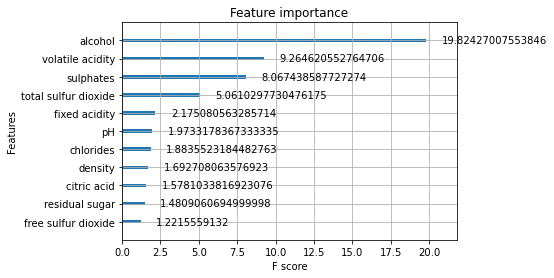

In [29]:
xgb.plot_importance(xgb_clf, importance_type='gain');

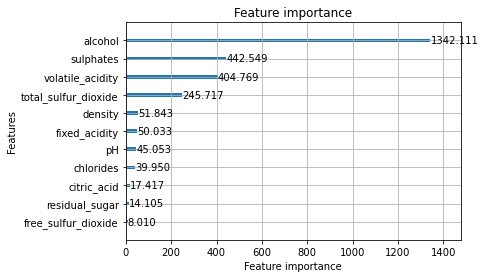

In [30]:
lgbm.plot_importance(lgbm_clf, importance_type='gain');

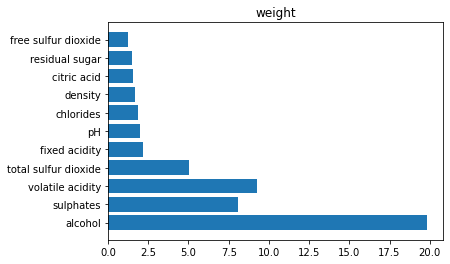

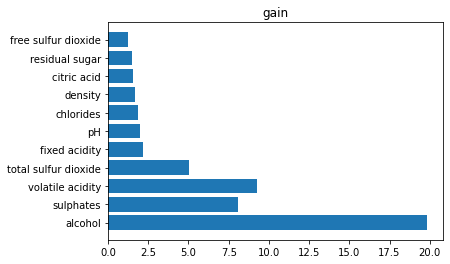

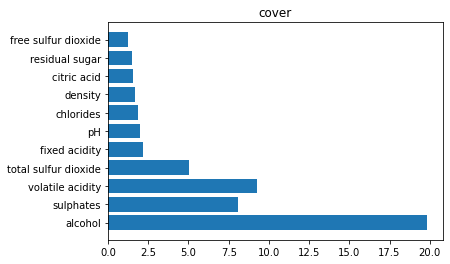

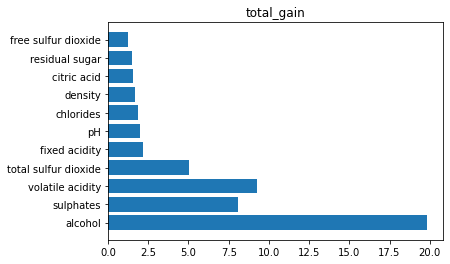

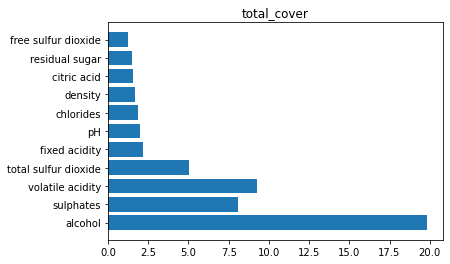

In [31]:
dict_imp = xgb_clf.get_booster().get_score(importance_type='gain')

for imp in ['weight', 'gain', 'cover', 'total_gain', 'total_cover']:
    plt.barh(list(dict_imp.keys()), list(dict_imp.values()));
    plt.title(imp)
    plt.show()

https://github.com/slundberg/shap

In [33]:
!pip install shap

In [34]:
import shap

In [35]:
shap.initjs()

model_type='lgbm'
 
explainer = shap.TreeExplainer(lgbm_clf)
shap_values = explainer.shap_values(X_test)
 
if model_type=='lgbm':
    shap_values = shap_values[1]

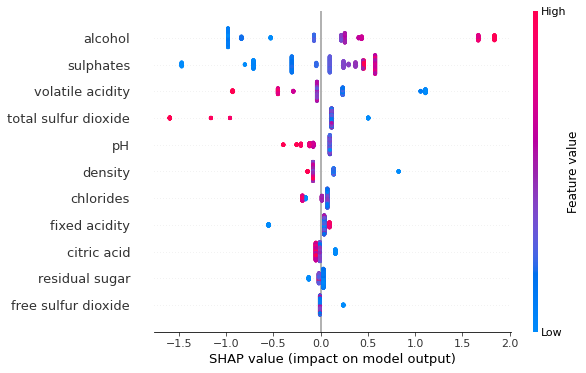

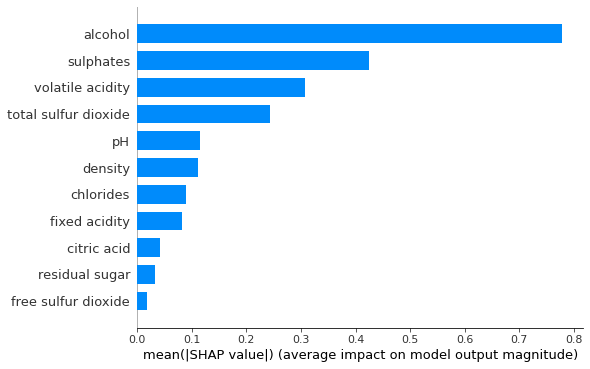

In [36]:
shap.summary_plot(shap_values, X_test, max_display=30)
 
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=30)